In [90]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']

In [91]:


## DEFINE STYLE
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

color_list =['red','green','blue','red','green','blue']
dash_list =[[3,1],[3,1],[3,1],
            [1000,1],[1000,1],[1000,1]]
marker_list = ['o','s','d','o','s','d']

In [92]:
Y_samples = []
dY_samples = []

system = 'Lorenz63'
filter_methods = ['GCV_ssplines','GCV_tikhonov','GCV_trendfilter','Pareto_ssplines','Pareto_tikhonov','Pareto_trendfilter']
n_filters = len(filter_methods)
n_states = 3
spreg = 'WBPDN'

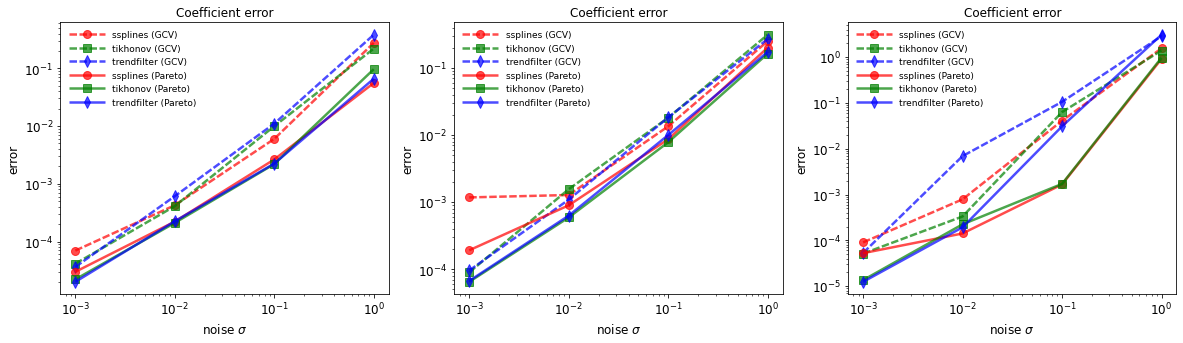

In [93]:
## GENERATE PLOTS --> ERRORS ON STATES
plt.close('all')
fig, axs = plt.subplots(1, 3, figsize = (20,5))

for state in range(n_states):

    for j,filtr in enumerate(filter_methods):
                
        #Load errors
        filepath = 'results/' + system + '/results_coef_error_noise_' + spreg + '_' + filtr + '.json'
        with open(filepath) as f:
            coef_error_dict = json.load(f)

        alphaVal = 0.7
        linethick = 2.5
        key = 'mean_error_'+str(state+1)
        txt = filtr.split("_")
        axs[state].plot(coef_error_dict['noise'],
                 coef_error_dict[key],
#                  color=colourWheel[j%len(colourWheel)],
                 color=color_list[j],
                 linestyle = '-',
                 marker = marker_list[j],
                 markersize=8,
#                  dashes=dashesStyles[j%len(dashesStyles)],
                 dashes=dash_list[j],
                 lw=linethick,
                 label=txt[1]+' ('+txt[0]+')',
                 alpha=alphaVal)
            
    axs[state].set_xscale("log")
    axs[state].set_yscale("log")
    axs[state].set_ylabel("error", size = 12)
    axs[state].set_xlabel("noise $\sigma$", size = 12)
    axs[state].legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
    axs[state].tick_params(labelsize = 12)
    axs[state].yaxis.tick_left()
    nameOfPlot = f'Coefficient error'
    axs[state].set_title(nameOfPlot, size = 12)
    axs[state].legend(frameon=False, loc='upper left',ncol=1,handlelength=4, fontsize = 9)
#     filename = f'filter_comparison_x{state+1}_error_gcv.eps'
#     fig.savefig(filename, format='eps', dpi=600)
#     plt.show()

    
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

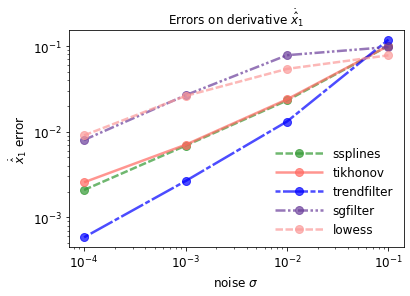

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

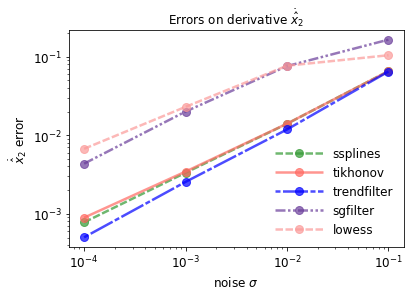

In [26]:
## GENERATE PLOTS --> ERRORS ON DERIVATIVES
for state in range(n_states):
    
    plt.close('all')
    fig, ax = plt.subplots()

    for j,filtr in enumerate(filter_methods):

        alphaVal = 0.7
        linethick = 2.5

        ax.plot(noise_lvls,
                 mean_dX_error[state,:,j],
                 color=colourWheel[j%len(colourWheel)],
                 linestyle = '-',
                 marker = 'o',
                 markersize=8,
                 dashes=dashesStyles[j%len(dashesStyles)],
                 lw=linethick,
                 label=filter_methods[j].lower(),
                 alpha=alphaVal)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(f"$\dot{{\hat{{x}}}}_{state+1}$ error", size = 12)
    ax.set_xlabel("noise $\sigma$", size = 12)
    ax.legend(frameon=False, loc='lower right',ncol=1,handlelength=2)
    ax.tick_params(labelsize = 12)
    ax.yaxis.tick_left()
    nameOfPlot = f'Errors on derivative $\dot{{\hat{{x}}}}_{state+1}$'
    ax.set_title(nameOfPlot, size = 12)
    ax.legend(frameon=False, loc='lower right',ncol=1,handlelength=4, fontsize = 12)
    filename = f'filter_comparison_dx{state+1}_error_gcv.eps'
    fig.savefig(filename, format='eps', dpi=600)
    plt.show()